# <a id="#">Task 2 – Image IO, Histograms, Intensity clipping</a>

In [1]:
import numpy
import matplotlib.pyplot as plt

---

## Image IO

**<a id="#">Task 2.1.</a>** Enter your solution below:

(<Figure size 640x480 with 2 Axes>,
 <matplotlib.colorbar.Colorbar at 0x7fa03adcdc90>)

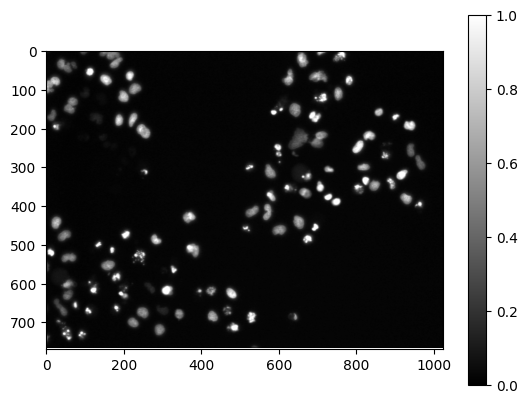

In [2]:
img = plt.imread('data/cells.png')
plt.figure(), plt.imshow(img, 'gray'), plt.colorbar()

---

## Histograms

**<a id="#">Task 2.2.</a>** Enter your solution below:

(array([705771.,  23593.,  12589.,  10115.,   9097.,   7896.,   5675.,
          3669.,   2568.,   5459.]),
 array([0.        , 0.1       , 0.2       , 0.30000001, 0.40000001,
        0.5       , 0.60000002, 0.69999999, 0.80000001, 0.89999998,
        1.        ]),
 <BarContainer object of 10 artists>)

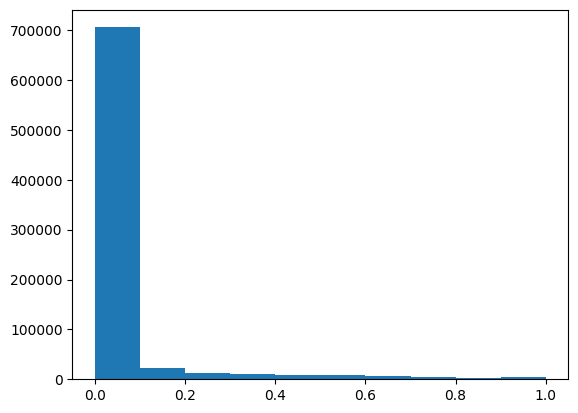

In [4]:
plt.hist(img.flatten())

---

## Intensity clipping

First we define some fixed thresholds $T_1$, $T_2$:

In [57]:
T1 = 0.31
T2 = 0.59

### Using `ndarray.clip` method

**<a id="#">Task 2.3.1.</a>** Enter your solution below:

(array([[0.31, 0.31, 0.31, ..., 0.31, 0.31, 0.31],
        [0.31, 0.31, 0.31, ..., 0.31, 0.31, 0.31],
        [0.31, 0.31, 0.31, ..., 0.31, 0.31, 0.31],
        ...,
        [0.31, 0.31, 0.31, ..., 0.31, 0.31, 0.31],
        [0.31, 0.31, 0.31, ..., 0.31, 0.31, 0.31],
        [0.31, 0.31, 0.31, ..., 0.31, 0.31, 0.31]], dtype=float32),
 <matplotlib.image.AxesImage at 0x7f9c82421f10>)

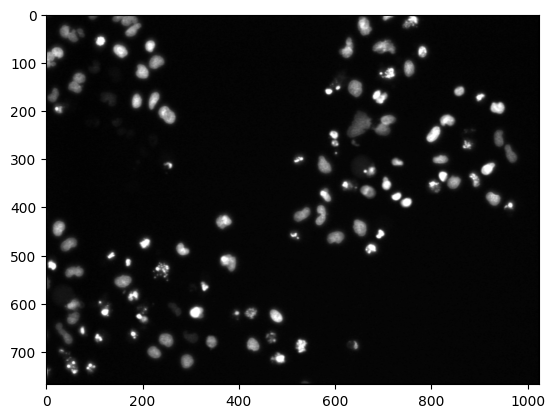

In [58]:
img.clip(T1, T2), plt.imshow(img, 'gray')

### Not using the `ndarray.clip` method

**<a id="#">Task 2.3.2 (a).</a>** Enter your solution below:

(<matplotlib.image.AxesImage at 0x7f9c80dc7910>,
 <matplotlib.colorbar.Colorbar at 0x7f9c807ee250>)

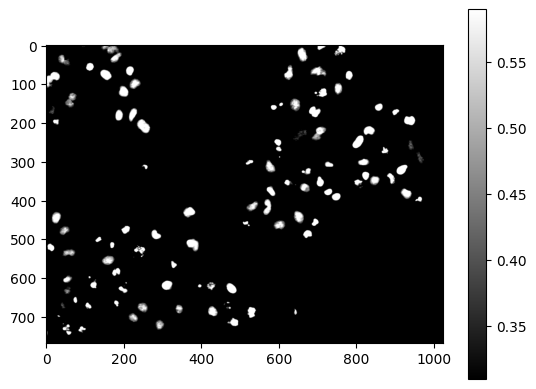

In [59]:
#two nested for loops (one outer loop for image rows/columns, one inner loop for pixels of current row/columns) and if conditions
img_fancy=img.copy()
nrow=img.shape[0]
ncol=img.shape[1]
for row in range(0,nrow):
    for col in range(0,ncol):
        if (img[row,col]<T1):
            img_fancy[row,col]=T1
        elif (img[row,col]>T2):
            img_fancy[row,col]=T2
plt.imshow(img_fancy, 'gray') , plt.colorbar()
        


**<a id="#">Task 2.3.2 (b).</a>** Enter your solution below:

(<matplotlib.image.AxesImage at 0x7f9c80732c90>,
 <matplotlib.colorbar.Colorbar at 0x7f9c81db8cd0>)

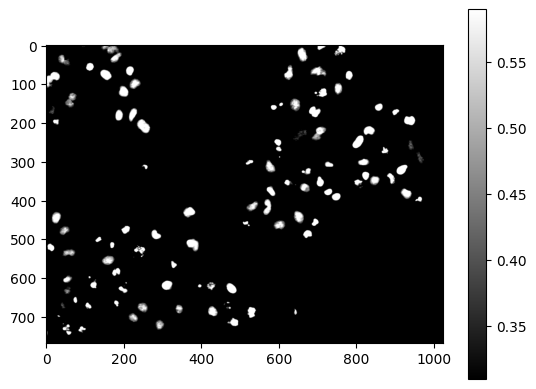

In [60]:
#single for loop and if conditions
img_awesome=img.copy()
for p in numpy.ndindex(img.shape):
    if (img[p]<T1):
        img_awesome[p]=T1
    elif (img[p]>T2):
        img_awesome[p]=T2
plt.imshow(img_awesome, 'gray') , plt.colorbar()
    
    

---

## Writing re-usable code (bonus)

**<a id="#">Task 2.3.4.</a>** Finish the implementation of the function `clip_image` below, by replacing the comment line (the one which starts with `#`) with your code:

In [61]:
def clip_image(img, T1, T2):
    img_awesome=img.copy()
    for p in numpy.ndindex(img.shape):
        if (img[p]<T1):
            img_awesome[p]=T1
        elif (img[p]>T2):
            img_awesome[p]=T2
    return img_awesome

**Hints:**
1. The implementation of the function starts after the `def`-line. Any instructions written *(i)* below this line and *(ii)* indented to the right will be run *from top to bottom* whenever you use this function. The execution of the function ends when the last instruction is reached or a `return` statement is encountered.
2. The purpose of the function `clip_image` is that it takes an *input* image `img` (along with two thresholds) and returns an *output* image (the clipped image). Make sure that you do *not* change the original input image!

We are going to check that the solution produced by `clip_img` equals the solution `ndarray.clip` produces. If the image you have loaded is not referenced by the variable `img` in your solution for **Task 2.1**, replace `img` by the name of the variable you used to reference the loaded image:

In [62]:
assert (clip_image(img, T1, T2) == img.clip(T1, T2)).all()

Now, we are going to show the clipping results produced using your `clip_image` implementation for different thresholds (`T1`, `T2`). The code below already shows the results for a pair of *two* thresholds. Supplement the code by adding the result for a *third* pair of thresholds!

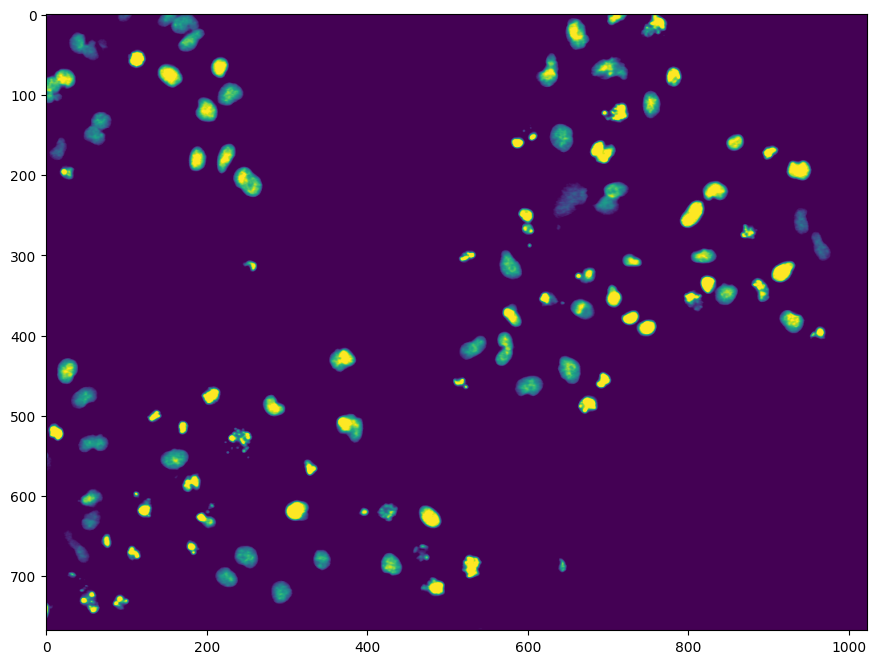

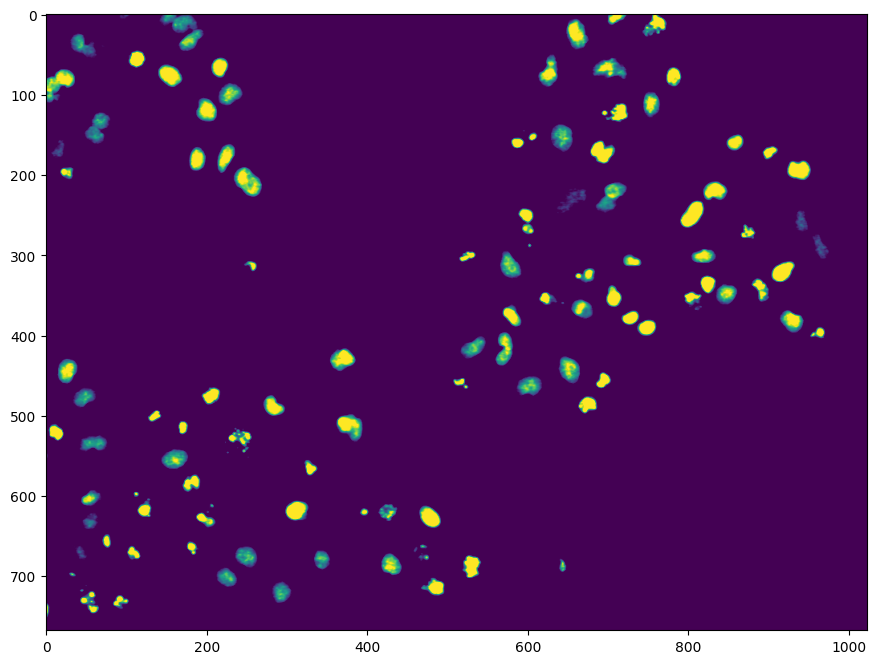

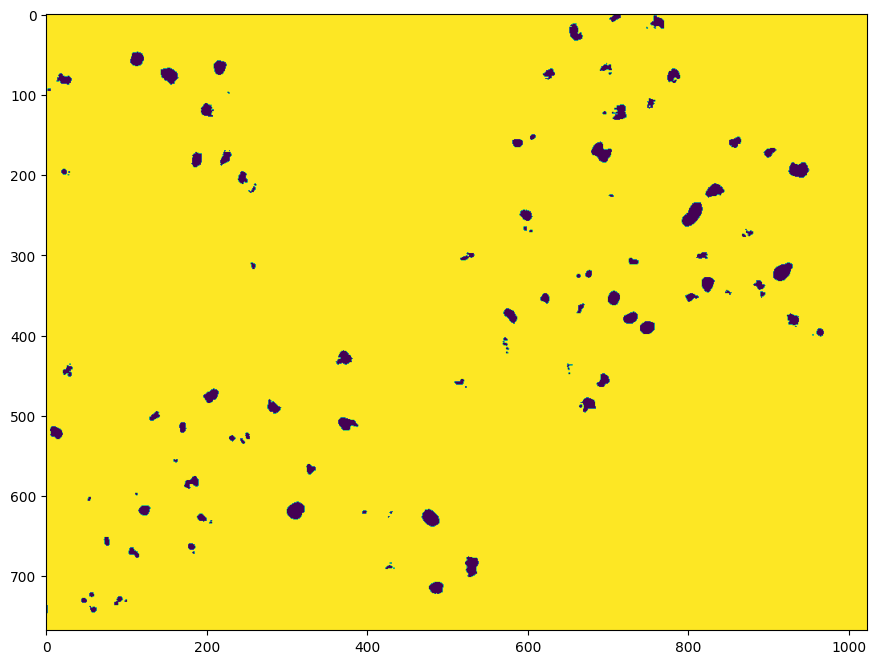

In [64]:
plt.figure(figsize=(15,8))
plt.imshow(clip_image(img, 0.2, 0.8))

plt.figure(figsize=(15,8))
plt.imshow(clip_image(img, 0.3, 0.7))

plt.figure(figsize=(15,8))
plt.imshow(clip_image(img, 0.7, 0.1))